In [1]:
from src.preprocessing import make_dataset
from datasets import load_dataset
import pandas as pd
import demoji
import matplotlib.pyplot as plt

c:\Users\subje\.conda\envs\justal\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATASET_NAME = "CreativeLang/EPIC_Irony"

In [3]:
df = make_dataset(pd.DataFrame(load_dataset(DATASET_NAME)['train']), equality=True) #whole dataset, without filtering

In [4]:
values = []

for index, value in df.iterrows():

    #get the emojis in the replies
    for emoji, description in zip(demoji.findall_list(value.text, desc = False), demoji.findall_list(value.text, desc = True)):
        values.append((emoji, description, value.id_original, True))

    #get the emojis in the posts
    for emoji, description in zip(demoji.findall_list(value.parent_text, desc = False), demoji.findall_list(value.parent_text, desc = True)):
        values.append((emoji, description, value.id_original, False))

In [5]:
df_emojis = pd.DataFrame(values, columns=['emoji', 'description', 'id_original', 'reply'])

In [6]:
df_emojis_comp = pd.merge(df_emojis, df, how='left')

In [7]:
print('Average number of emojis per text (post or reply):', round(len(df_emojis_comp)/len(df.id_original), 2))

Average number of emojis per text (post or reply): 0.5


In [8]:
print('Average number of emojis per twitter reply:', round(len(df_emojis_comp.query('reply==1 and source=="twitter"').emoji)/len(df[df.source=='twitter']), 2))

Average number of emojis per twitter reply: 0.51


In [9]:
print('Average number of emojis per reddit reply:', round(len(df_emojis_comp.query('reply==1 and source=="reddit"').emoji)/len(df[df.source=='reddit']), 2))

Average number of emojis per reddit reply: 0.02


In [10]:
print('Average number of emojis per non-ironic twitter reply:', round(len(df_emojis_comp.query('label==0 and reply==1 and source=="twitter"').emoji)/len(df.query('label==0 and source=="twitter"')), 2))

Average number of emojis per non-ironic twitter reply: 0.51


In [11]:
print('Average number of emojis per ironic twitter reply:', round(len(df_emojis_comp.query('label==1 and reply==1 and source=="twitter"').emoji)/len(df.query('label==1 and source=="twitter"')), 2))

Average number of emojis per ironic twitter reply: 0.49


In [12]:
print('Average number of emojis per non-ironic reddit reply:', round(len(df_emojis_comp.query('label==0 and reply==1 and source=="reddit"').emoji)/len(df.query('label==0 and source=="reddit"')), 2))

Average number of emojis per non-ironic reddit reply: 0.02


In [13]:
print('Average number of emojis per ironic reddit reply:', round(len(df_emojis_comp.query('label==1 and reply==1 and source=="reddit"').emoji)/len(df.query('label==1 and source=="reddit"')), 2))

Average number of emojis per ironic reddit reply: 0.01


In [14]:
#emojis per source
pd.crosstab(df_emojis_comp.source, df_emojis_comp.emoji, margins=True)

emoji,‼️,™,☀️,☕,☘️,☠️,☮️,☹️,☺️,♥,...,🦪,🧊,🧛‍♂️,🧡,🧢,🧳,🧵,🧿,🫂,All
source,,,,,,,,,,,,,,,,,,,,,
reddit,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,47
twitter,4,0,3,17,1,2,2,2,2,5,...,1,1,1,5,1,1,3,1,1,1457
All,4,3,3,17,1,2,2,2,2,5,...,1,1,1,5,1,1,3,1,1,1504


In [15]:
#emojis per source and label
pd.crosstab([df_emojis_comp.source, df_emojis_comp.label], df_emojis_comp.emoji, margins=True)

emoji          ‼️  ™  ☀️   ☕  ☘️  ☠️  ☮️  ☹️  ☺️  ♥  ...  🦪  🧊  🧛‍♂️  🧡  🧢  🧳  \
source  label                                        ...                        
reddit  0       0  2   0   0   0   0   0   0   0  0  ...  0  0     0  0  0  0   
        1       0  1   0   0   0   0   0   0   0  0  ...  0  0     0  0  0  0   
twitter 0       4  0   2  17   1   0   2   1   2  5  ...  0  1     0  5  1  1   
        1       0  0   1   0   0   2   0   1   0  0  ...  1  0     1  0  0  0   
All             4  3   3  17   1   2   2   2   2  5  ...  1  1     1  5  1  1   

emoji          🧵  🧿  🫂   All  
source  label                 
reddit  0      0  0  0    33  
        1      0  0  0    14  
twitter 0      3  1  1  1195  
        1      0  0  0   262  
All            3  1  1  1504  

[5 rows x 283 columns]

In [16]:
print('Average number of emojis per non-ironic reply:', round(len(df_emojis_comp.query('label==0 and reply==1').emoji)/len(df[df.label==0]), 2))

Average number of emojis per non-ironic reply: 0.29


In [17]:
print('Average number of emojis per ironic reply:', round(len(df_emojis_comp.query('label==1 and reply==1').emoji)/(len(df[df.label==1])*2), 2))

Average number of emojis per ironic reply: 0.09


In [18]:
pd.crosstab(df_emojis_comp.label, df_emojis_comp.emoji, margins=True)

emoji,‼️,™,☀️,☕,☘️,☠️,☮️,☹️,☺️,♥,...,🦪,🧊,🧛‍♂️,🧡,🧢,🧳,🧵,🧿,🫂,All
label,,,,,,,,,,,,,,,,,,,,,
0,4,2,2,17,1,0,2,1,2,5,...,0,1,0,5,1,1,3,1,1,1228
1,0,1,1,0,0,2,0,1,0,0,...,1,0,1,0,0,0,0,0,0,276
All,4,3,3,17,1,2,2,2,2,5,...,1,1,1,5,1,1,3,1,1,1504


<AxesSubplot: >

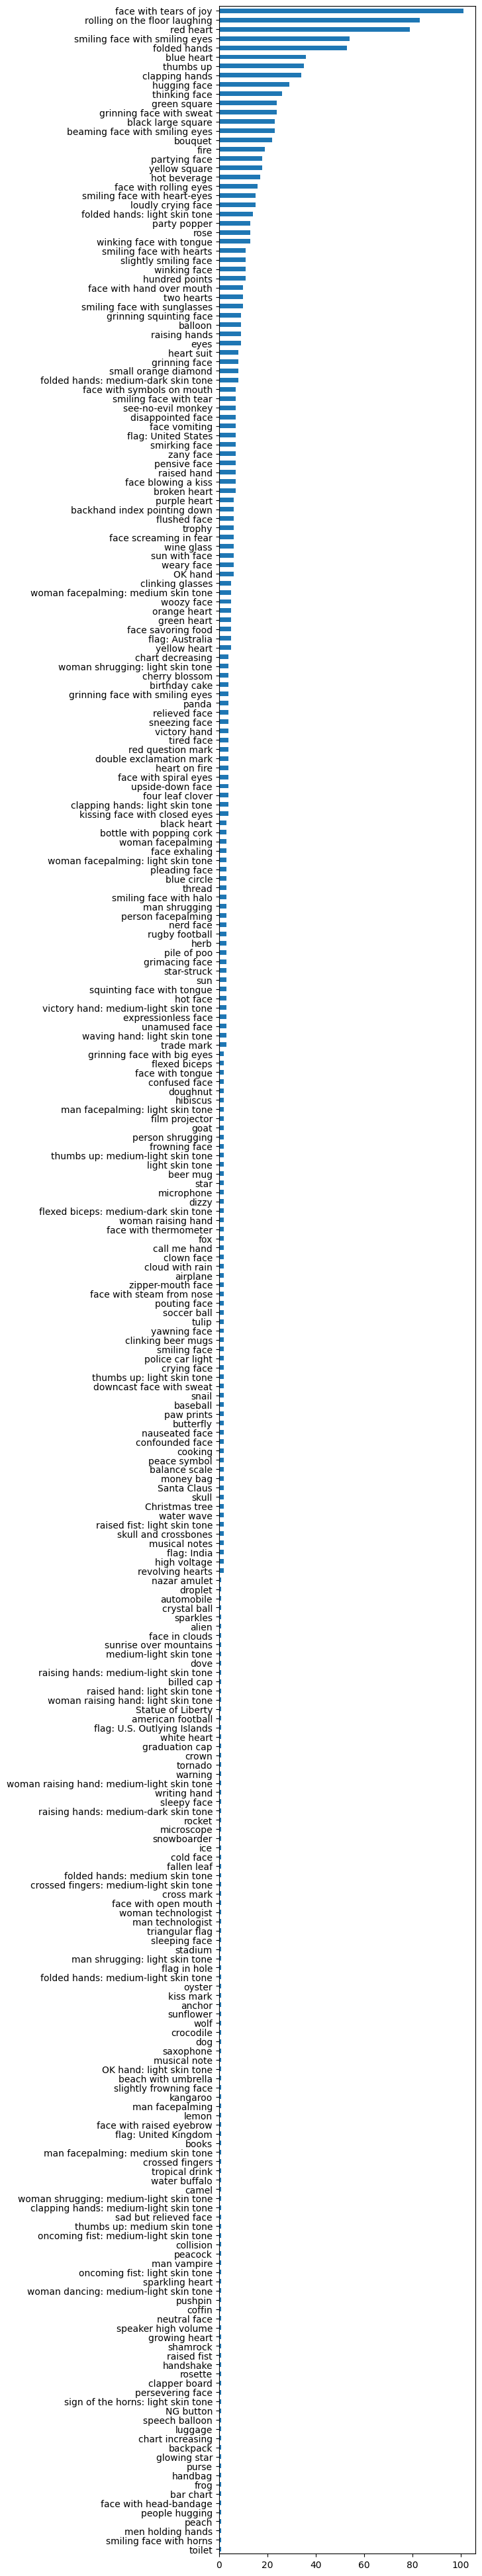

In [19]:
#number of emojis
#/!\ extremely long plot
plt.figure(figsize=(5,50))
df_emojis.description.value_counts(ascending=True).plot.barh()